In [1]:
import random
import pandas as pd
import numpy as np

## Test with different tags for events (less tags)

In [2]:
app_tags = [
    "Prácticas Laborales",
    "Empleabilidad",
    "Liderazgo", 
    "Emprendimiento",
    "Desarrollo profesional",
    "Marketing",
     "Finanzas",
    "Gestión Empresarial",
    "Innovación",
    "Tecnología",
    "Sostenibilidad",
    "Recursos Humanos",
    "Gastronomía",
    "Artes visuales",
    "Deportes",
     "Aire Libre",
    "E-learning",
    "Gaming",
    "Moda",
    "Inteligencia Artificial",
    "Realidad Virtual",
    "Música",
    "Cultura",
    "Ciberseguridad",
    "Blockchain",
    "Talleres programación",
    "Deportes"
]

cluster_tags = [
    "Desarrollo profesional",
    "Negocios y Finanzas",
    "Innovación y Tecnologia",
    "Sostenibilidad",
    "Recursos Humanos",
    "Estilo de vida",
    "Arte y Cultura",
    "Aprendizaje y educación",
    "Gaming"
]

#### New events, users from the DDBB (for now fake ones I created)

In [3]:
df_users_mongoDB = pd.read_csv("users_mongoDB_fake.csv")
df_events_mongoDB = pd.read_csv("events_mongoDB_fake.csv") 

In [37]:


# Generar el DataFrame
tabla = []

np.random.seed(42)

for i in range(50):
    #evento = {"Evento": "Evento " + str(i + 1)}
    evento = {"id_event": i+1}

    etiquetas_asignadas = random.sample(cluster_tags, 3)
    for elemento in cluster_tags:
        evento[elemento] = 1 if elemento in etiquetas_asignadas else 0
    tabla.append(evento)

df_eventos = pd.DataFrame(tabla)


TypeError: sample() got an unexpected keyword argument 'seed'

In [15]:
df_eventos.to_csv("df_eventos_nuevos_tags.csv", index=False)

In [27]:
df_eventos = pd.read_csv("df_eventos_nuevos_tags.csv", encoding="utf-8")

In [13]:
df_eventos_total = pd.concat((df_eventos,df_events_mongoDB.drop(["time"], axis=1))).reset_index(drop=True)

In [14]:
df_eventos_total

,id_event,Desarrollo profesional,Negocios y Finanzas,Innovación y Tecnologia,Sostenibilidad,Recursos Humanos,Estilo de vida,Arte y Cultura,Aprendizaje y educación,Gaming
0,1,0,0,0,0,1,1,0,1,0
1,2,0,0,0,1,1,1,0,0,0
2,3,0,1,1,0,0,0,0,0,1
3,4,0,0,0,1,0,0,1,1,0
4,5,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
65,648349af53f64d713994375a,0,0,4,1,0,0,0,0,0
66,648349af53f64d713994375b,1,0,1,0,0,0,0,1,0
67,648349af53f64d713994375c,2,3,0,0,0,0,0,0,0
68,648349af53f64d713994375d,0,1,2,1,0,0,0,0,0


In [16]:
np.random.seed(42)  # Para reproducibilidad de los datos aleatorios

# Crear diccionario de etiquetas para asignar a los eventos
diccionario_eventos = {}
#Las categorias son las mismas columnas de los tags en el df_eventos
categorias = list(df_eventos_total.columns[1:])

#for categoria in categorias:
#    diccionario_eventos[categoria] = np.random.randint(0, 2, size=200)  # 0 o 1 para indicar si ha acudido a un evento de la categoría

# Generar datos para el dataframe
data = []
for i in range(1000):
    id_usuario = i + 1
    #generar el número de eventos al cual el usuario participa, sacados de una distribución normal de media 15 y sigma 5
    num_eventos = int(np.random.normal(15, 5))  
    #OSS si el numero de eventos es 0 da problemas, pues pongo que minimo ha asistido a 1
    if num_eventos==0:
        num_eventos=1
    # Generar a cual eventos aleatorios el usuario ha participado, dependiendo de num_eventos
    deck = list(range(0,len(df_eventos_total)))
    np.random.shuffle(deck)
    #index eventos es un array que tendrá los id_events (en realidad id_events-1) a los cuales el usuario ha participado
    index_eventos =np.array(deck[0:num_eventos])
    #pongo 1 solo a los eventos al cual el usuario ha participado
    participacion_eventos = np.zeros(len(df_eventos_total),dtype=int)
    participacion_eventos[index_eventos]=1
    #Ahora quiero obtener los tags de cada evento al cual el usuario ha participado
    #Antes de todo defino los id de los eventos al cual el usuario ha participado, que serán index_eventos + 1
    #Eso porque index_eventos son valores entre 0 y 49, y los id_eventos los hemos puestos empezando de 1 y no 0
    id_eventos = index_eventos + 1

    #Ahora voy al df_eventos y le pongo mascara para selecionar solo los eventos con los id_event a los cuales el usuario
    # ha participado. Seleciono solo las columnas de los tags (iloc[:,1:]), y sumo todos los valores que hay en cada columna.
    # Me quedo con un DataSeries con los tags y los valores de las sumas, yo solo quiero los valores y le pongo values.
    valores_categorias = df_eventos_total[df_eventos_total["id_event"].isin(id_eventos)].iloc[:,1:].sum().values
    eventos_categoria = {categorias[i] : valores_categorias[i] for i in range(len(categorias))}
 
    if num_eventos < 0:
        num_eventos = 0
    estudio = np.random.choice(["Grado", "Master", "Bootcamp"], p=[0.73, 0.21, 0.06])
    if estudio == "Grado":
        edad = np.random.randint(18, 26)
        sexo = np.random.choice(["Hombre", "Mujer"], p=[0.64, 0.36])
    elif estudio == "Master":
        edad = np.random.randint(24, 31)
        sexo = np.random.choice(["Hombre", "Mujer"], p=[0.66, 0.34])
    else:  # Bootcamp
        edad = np.random.randint(19, 46)
        sexo = np.random.choice(["Hombre", "Mujer"], p=[0.81, 0.19])
    emprende = np.random.choice([0, 1], p=[0.4, 0.6])

    for j in range(len(df_eventos_total)):
        row = [id_usuario, j+1, num_eventos, estudio, edad, sexo, emprende]
        for categoria in categorias:
            row.append(eventos_categoria[categoria])
        row.append(participacion_eventos[j])
        data.append(row)

# Crear dataframe
columnas = ["id_user", "id_event", "num_eventos", "estudio", "edad", "sexo", "emprende"]
columnas += categorias
columnas += ["participation"]
df = pd.DataFrame(data, columns=columnas)

# Mostrar el dataframe
df

,id_user,id_event,num_eventos,estudio,edad,sexo,emprende,Desarrollo profesional,Negocios y Finanzas,Innovación y Tecnologia,Sostenibilidad,Recursos Humanos,Estilo de vida,Arte y Cultura,Aprendizaje y educación,Gaming,participation
0,1,1,17,Master,28,Hombre,1,4.0,4.0,3.0,3.0,4.0,6.0,4.0,5.0,6.0,1
1,1,2,17,Master,28,Hombre,1,4.0,4.0,3.0,3.0,4.0,6.0,4.0,5.0,6.0,0
2,1,3,17,Master,28,Hombre,1,4.0,4.0,3.0,3.0,4.0,6.0,4.0,5.0,6.0,0
3,1,4,17,Master,28,Hombre,1,4.0,4.0,3.0,3.0,4.0,6.0,4.0,5.0,6.0,0
4,1,5,17,Master,28,Hombre,1,4.0,4.0,3.0,3.0,4.0,6.0,4.0,5.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1000,66,6,Grado,25,Hombre,0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,0
69996,1000,67,6,Grado,25,Hombre,0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,0
69997,1000,68,6,Grado,25,Hombre,0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,0
69998,1000,69,6,Grado,25,Hombre,0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,0


In [17]:
df.to_csv("df_usuarios_sinteticos_nuevos_tags.csv", index=False)

In [28]:
df = pd.read_csv("df_usuarios_sinteticos_nuevos_tags.csv")

In [29]:
df_users_total = pd.concat((df.drop(["num_eventos", "estudio", "edad", "sexo", "emprende"],axis=1),df_users_mongoDB)).reset_index(drop=True)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from collections import defaultdict #data colector

#Surprise: https://surprise.readthedocs.io/en/stable/
import surprise

from surprise.reader import Reader
from surprise import Dataset
from surprise.model_selection import GridSearchCV

  ##CrossValidation
from surprise.model_selection import cross_validate


  ##Matrix Factorization Algorithms
from surprise import SVD
from surprise import NMF
from surprise import KNNBasic, KNNWithZScore, KNNWithMeans


np.random.seed(42) # replicating results

In [31]:
df_users = df_users_total.set_index("id_user")
#Only select the columns with the tags
V = df_users.iloc[:,1:-1].drop_duplicates()
#Add a user with very low participation, only 2 to technology and 1 to learning
user_event_matrix = V.reset_index()

# Reshape the DataFrame to long format
df = pd.melt(user_event_matrix, id_vars='id_user', var_name='event', value_name='participation')
df.columns = ['user', 'event', 'participation']

In [32]:
df_train = df#[df["user"]<=900]
#df_test = df[df["user"]>900]

Get the max value of participation of the entire dataframe of users to set the rating_scale in the Reader function

In [33]:
max_value = df["participation"].max()

In [34]:
reader = Reader(rating_scale=(0, max_value))
data = Dataset.load_from_df(df=df_train, reader=reader)
#data_test = Dataset.load_from_df(df=df_test, reader=reader)

trainset = data.build_full_trainset()

#This is how to build a testset for the predictions
testset = data.build_full_trainset()
testset = testset.build_testset()

In [367]:
def rmse_vs_factors(algorithm, data):
  """Returns: rmse_algorithm i.e. a list of mean RMSE of CV = 5 in cross_validate() for each  factor k in range(1, 101, 1)
  100 values 
  Arg:  i.) algorithm = Matrix factoization algorithm, e.g SVD/NMF/PMF, ii.)  data = surprise.dataset.DatasetAutoFolds
  """
  
  rmse_algorithm = []
  
  for k in range(1, 101, 1):
    algo = algorithm(n_factors = k)
    
    #["test_rmse"] is a numpy array with min accuracy value for each testset
    loss_fce = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)["test_rmse"].mean() 
    rmse_algorithm.append(loss_fce)
  
  return rmse_algorithm

In [368]:
rmse_svd = rmse_vs_factors(SVD,data)

In [328]:
rmse_nmf = rmse_vs_factors(NMF,data)

In [369]:
def plot_rmse(rmse, algorithm):
  """Returns: sub plots (2x1) of rmse against number of factors. 
     Vertical line in the second subplot identifies the arg for minimum RMSE
    
     Arg: i.) rmse = list of mean RMSE returned by rmse_vs_factors(), ii.) algorithm = STRING! of algo 
  """
  
  plt.figure(num=None, figsize=(11, 5), dpi=80, facecolor='w', edgecolor='k')

  plt.subplot(2,1,1)
  plt.plot(rmse)
  plt.xlim(0,100)
  plt.title("{0} Performance: RMSE Against Number of Factors".format(algorithm), size = 20 )
  plt.ylabel("Mean RMSE (cv=5)")

  plt.subplot(2,1,2)
  plt.plot(rmse)
  plt.xlim(0,50)
  plt.xticks(np.arange(0, 50, step=2))

  plt.xlabel("{0}(n_factor = k)".format(algorithm))
  plt.ylabel("Mean RMSE (cv=5)")
  plt.axvline(np.argmin(rmse), color = "r")

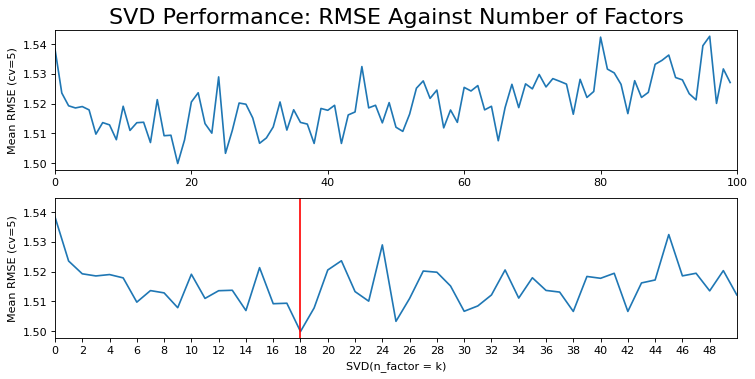

In [370]:
plot_rmse(rmse_svd,"SVD")

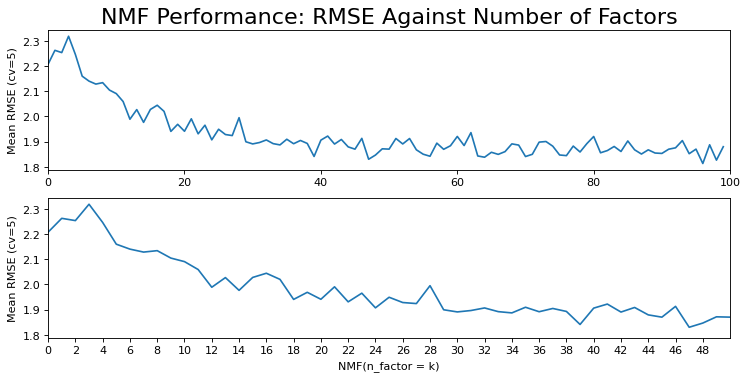

In [329]:
plot_rmse(rmse_nmf,"NMF")

SVD

In [24]:
param_grid = {'n_factors': range(0,100)}
gs_svd = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
gs_svd.fit(data)


# best RMSE score
print(gs_svd.best_score['rmse'])

print(gs_svd.best_score['mae'])

# combination of parameters that gave the best RMSE score
print(gs_svd.best_params['rmse'])

1.4697296601913004
1.155452414530029
{'n_factors': 35}


In [36]:
#Not sure if MAPE makes sense to be checked for this model
print("MAPE (SVD):")
print(gs_svd.best_score['mae']/df["participation"].mean())

MAPE (SVD):
0.3422668420497754


NMF

In [373]:
param_grid = {'n_factors': range(0,50)}
gs_nmf = GridSearchCV(NMF, param_grid, measures=['rmse', 'mae'], cv=5)
gs_nmf.fit(data)


# best RMSE score
print(gs_nmf.best_score['rmse'])

print(gs_nmf.best_score['mae'])

# combination of parameters that gave the best RMSE score
print(gs_nmf.best_params['rmse'])

1.4887918084712526
1.1697047997855963
{'n_factors': 49}


In [374]:
#MAPE of 38% a bit shitty I guess
print("MAPE (NMF):")
print(gs_nmf.best_score['mae']/df["participation"].mean())

MAPE (NMF):
0.34655229161349654


KNN

In [40]:
param_grid = {'k': range(3,50)}
gs_knn = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5)
gs_knn.fit(data)


# best RMSE score
print(gs_knn.best_score['rmse'])

print(gs_knn.best_score['mae'])

# combination of parameters that gave the best RMSE score
print(gs_knn.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [41]:
#MAPE of 38% a bit shitty I guess
print("MAPE (KNN):")
print(gs_knn.best_score['mae']/df["participation"].mean())

MAPE (NMF):
0.27693847556723805


KNNWithMeans

In [42]:
param_grid = {'k': range(3,50)}
gs_knn_means = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5)
gs_knn_means.fit(data)


# best RMSE score
print(gs_knn_means.best_score['rmse'])

print(gs_knn_means.best_score['mae'])

# combination of parameters that gave the best RMSE score
print(gs_knn_means.best_params['rmse'])
print(gs_knn_means.best_params['mae'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [43]:
#MAPE of 38% a bit shitty I guess
print("MAPE (knn_means):")
print(gs_knn_means.best_score['mae']/df["participation"].mean())

MAPE (NMF):
0.2717568608658342


## PREDICTIONS

In [474]:
model = SVD(gs_svd.best_params['rmse']["n_factors"])
print(gs_svd.best_params['rmse']["n_factors"])

16


In [475]:
model.fit(trainset)

In [406]:
item_factors = model.qi

In [407]:
item_factors

array([[-7.03224135e-01,  3.75566454e-01, -8.67591855e-02,
         1.39204714e+00, -1.37623419e+00, -1.52855775e+00,
        -7.32323791e-02, -1.90348962e+00, -1.21853574e+00,
         4.19896804e-01, -1.38127492e+00, -3.51687885e-01],
       [ 2.12524624e+00, -1.86237618e-01,  3.54964805e-02,
         2.15560538e+00, -6.84053289e-01, -1.33522893e+00,
        -1.63765899e-01,  3.98822745e-01, -1.00038798e-02,
        -4.25269160e-01, -4.11219258e-01,  2.07412503e+00],
       [ 9.81814345e-02,  6.95649478e-01, -4.84479673e-01,
         8.63624029e-01, -4.63151941e-01,  9.50828795e-02,
        -1.05769094e+00, -1.62664827e-01,  1.62095304e-01,
         1.04394265e+00, -8.53495468e-01, -4.02257169e-01],
       [-1.18288780e+00, -4.32387227e-01,  3.05231330e-02,
         1.04180122e+00, -1.01560926e+00, -2.37594673e+00,
         8.26392536e-01, -6.81454209e-01,  9.03061263e-01,
        -5.74397077e-01,  4.07878406e-01,  3.81795769e-02],
       [ 2.53295918e-01,  9.23123469e-02, -8.3727457

### Predictions on test set

In [408]:
testset

[(1, 'Desarrollo profesional', 5.0),
 (1, 'Negocios y Finanzas', 6.0),
 (1, 'Innovación y Tecnologia', 3.0),
 (1, 'Sostenibilidad', 5.0),
 (1, 'Recursos Humanos', 3.0),
 (1, 'Estilo de vida', 5.0),
 (1, 'Arte y Cultura', 3.0),
 (1, 'Aprendizaje y educación', 4.0),
 (1, 'Gaming', 5.0),
 (2, 'Desarrollo profesional', 1.0),
 (2, 'Negocios y Finanzas', 4.0),
 (2, 'Innovación y Tecnologia', 3.0),
 (2, 'Sostenibilidad', 2.0),
 (2, 'Recursos Humanos', 2.0),
 (2, 'Estilo de vida', 3.0),
 (2, 'Arte y Cultura', 2.0),
 (2, 'Aprendizaje y educación', 4.0),
 (2, 'Gaming', 6.0),
 (3, 'Desarrollo profesional', 4.0),
 (3, 'Negocios y Finanzas', 2.0),
 (3, 'Innovación y Tecnologia', 6.0),
 (3, 'Sostenibilidad', 3.0),
 (3, 'Recursos Humanos', 3.0),
 (3, 'Estilo de vida', 5.0),
 (3, 'Arte y Cultura', 3.0),
 (3, 'Aprendizaje y educación', 6.0),
 (3, 'Gaming', 4.0),
 (4, 'Desarrollo profesional', 3.0),
 (4, 'Negocios y Finanzas', 3.0),
 (4, 'Innovación y Tecnologia', 3.0),
 (4, 'Sostenibilidad', 4.0),
 (4,

In [476]:
predictions = model.test(testset)

In [477]:
len(predictions)

9063

In [478]:
predictions

[Prediction(uid=1, iid='Desarrollo profesional', r_ui=5.0, est=4.370617139147348, details={'was_impossible': False}),
 Prediction(uid=1, iid='Negocios y Finanzas', r_ui=3.0, est=3.1055817881119694, details={'was_impossible': False}),
 Prediction(uid=1, iid='Innovación y Tecnologia', r_ui=5.0, est=4.954984297409382, details={'was_impossible': False}),
 Prediction(uid=1, iid='Sostenibilidad', r_ui=7.0, est=6.857838121353581, details={'was_impossible': False}),
 Prediction(uid=1, iid='Recursos Humanos', r_ui=3.0, est=3.967726017867416, details={'was_impossible': False}),
 Prediction(uid=1, iid='Estilo de vida', r_ui=3.0, est=3.3840839520703647, details={'was_impossible': False}),
 Prediction(uid=1, iid='Arte y Cultura', r_ui=4.0, est=3.5600899082912196, details={'was_impossible': False}),
 Prediction(uid=1, iid='Aprendizaje y educación', r_ui=5.0, est=4.566847587464336, details={'was_impossible': False}),
 Prediction(uid=1, iid='Gaming', r_ui=4.0, est=3.6731308080790948, details={'was_imp

In [511]:
def get_top_n(predictions, n = 9):
    '''Return the top N (default) movieId for a user,.i.e. userID and history for comparisom
    Args:
    Returns: 
  
    '''
    #Part I.: Surprise docomuntation
    
    #1. First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    #2. Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        #top_n[uid] = user_ratings[:n]
        top_n[uid] = dict(user_ratings[:n])
    
    return top_n

In [512]:
top_n_clusterTags = get_top_n(predictions)

In [513]:
top_n_clusterTags

defaultdict(list,
            {1: {'Sostenibilidad': 6.857838121353581,
              'Innovación y Tecnologia': 4.954984297409382,
              'Aprendizaje y educación': 4.566847587464336,
              'Desarrollo profesional': 4.370617139147348,
              'Recursos Humanos': 3.967726017867416,
              'Gaming': 3.6731308080790948,
              'Arte y Cultura': 3.5600899082912196,
              'Estilo de vida': 3.3840839520703647,
              'Negocios y Finanzas': 3.1055817881119694},
             2: {'Sostenibilidad': 4.75208883452271,
              'Desarrollo profesional': 3.340312874182942,
              'Aprendizaje y educación': 3.203196078241313,
              'Innovación y Tecnologia': 3.1286599073494683,
              'Arte y Cultura': 2.9645007905800256,
              'Negocios y Finanzas': 2.773369899703021,
              'Gaming': 2.6139865888218266,
              'Recursos Humanos': 2.0557533738146483,
              'Estilo de vida': 2.0400959423330702}

#### Important INTERPRETATION

We can observe that if we look at the original matrix, the top categories of event for user "6483c9bc6d386542ccf97cb0" are:

- Innovación y Tecnologia: 7
- Negocios y Finanzas: 3
- Sostenibilidad: 3
- Estilo de vida:	3
- Desarrollo profesional:	1

The predictions of our model instead gives us the scores:
- 'Innovación y Tecnologia', 4.345545503223931
- 'Estilo de vida', 2.567346030959505
- 'Desarrollo profesional', 2.4003032347528066
- 'Negocios y Finanzas', 2.3408710278004747


So for instance the model recognized that this user might be interested in "Desarrollo profesional", even though in the original matrix his/her participation was lower than other type of events.

This is due to collaborative filtering, the algorithms recognize patterns between different users and suggest this particupar user possible interests, due to his/her similarity with other users.

In [481]:
top_n_clusterTags["6483c9bc6d386542ccf97cb0"]

[('Innovación y Tecnologia', 3.6404410383781833),
 ('Sostenibilidad', 3.1460724856180375),
 ('Recursos Humanos', 2.0646957766968215),
 ('Estilo de vida', 1.953843327166245),
 ('Arte y Cultura', 1.94485117994141),
 ('Negocios y Finanzas', 1.6090137812311558),
 ('Aprendizaje y educación', 1.4988264830007993),
 ('Gaming', 1.381340686207569),
 ('Desarrollo profesional', 1.0895732782391807)]

In [482]:
df_train[df_train["user"]=="6483c9bc6d386542ccf97cb0"]

,user,event,participation
1006,6483c9bc6d386542ccf97cb0,Desarrollo profesional,1.0
2013,6483c9bc6d386542ccf97cb0,Negocios y Finanzas,3.0
3020,6483c9bc6d386542ccf97cb0,Innovación y Tecnologia,7.0
4027,6483c9bc6d386542ccf97cb0,Sostenibilidad,3.0
5034,6483c9bc6d386542ccf97cb0,Recursos Humanos,0.0
6041,6483c9bc6d386542ccf97cb0,Estilo de vida,3.0
7048,6483c9bc6d386542ccf97cb0,Arte y Cultura,0.0
8055,6483c9bc6d386542ccf97cb0,Aprendizaje y educación,1.0
9062,6483c9bc6d386542ccf97cb0,Gaming,0.0


## Mapping to predictions for events

- First I have to map the predictions from being on the cluster_tags to being predictions on the single tags
- Then I must take the df_events (the one from mongo), use a mask to delete the events which are in the past and at which the user already put participation, and then look at which tags they have and assign a score (average of the scores of each tag)


Considerations of the method:
- If an event has too many tags it is penalized by our model:
    Create an example to explain it

#### First step: Converting the score for the cluster_tags into scores for the actual tags

In [485]:
mapping_tags = {
    "Desarrollo profesional" : ["Prácticas Laborales", "Empleabilidad", "Liderazgo", "Emprendimiento", "Desarrollo profesional"],
    "Negocios y Finanzas" : ["Marketing", "Finanzas", "Gestión empresarial"],
    "Innovación y Tecnologia" : ["Innovación", "Tecnología", "Inteligencia Artificial", "Realidad Virtual", "Blockchain", "Ciberseguridad" ],
    "Sostenibilidad" : ["Sostenibilidad"],
    "Recursos Humanos" : ["Recursos Humanos"],
    "Estilo de vida" : ["Gastronomía", "Aire Libre", "Moda", "Deportes"],
    "Arte y Cultura" : [ "Música", "Cultura", "Artes visuales"],
    "Aprendizaje y educación" : ["E-learning", "Talleres programación"],
    "Gaming" : ["Gaming"]
}    

In [514]:
top_n_tags = {key : {} for key in top_n_clusterTags.keys()}
for key, value in top_n_clusterTags.items():
    for cluster_tag in value:
        for tag in mapping_tags[cluster_tag[0]]:
            top_n_tags[key][tag] =  cluster_tag[1]

KeyError: 'S'

Check that it's all good

In [487]:
top_n_tags["6483c9bc6d386542ccf97cb0"]

{'Innovación': 3.6404410383781833,
 'Tecnología': 3.6404410383781833,
 'Inteligencia Artificial': 3.6404410383781833,
 'Realidad Virtual': 3.6404410383781833,
 'Blockchain': 3.6404410383781833,
 'Ciberseguridad': 3.6404410383781833,
 'Sostenibilidad': 3.1460724856180375,
 'Recursos Humanos': 2.0646957766968215,
 'Gastronomía': 1.953843327166245,
 'Aire Libre': 1.953843327166245,
 'Moda': 1.953843327166245,
 'Deportes': 1.953843327166245,
 'Música': 1.94485117994141,
 'Cultura': 1.94485117994141,
 'Artes visuales': 1.94485117994141,
 'Marketing': 1.6090137812311558,
 'Finanzas': 1.6090137812311558,
 'Gestión empresarial': 1.6090137812311558,
 'E-learning': 1.4988264830007993,
 'Talleres programación': 1.4988264830007993,
 'Gaming': 1.381340686207569,
 'Prácticas Laborales': 1.0895732782391807,
 'Empleabilidad': 1.0895732782391807,
 'Liderazgo': 1.0895732782391807,
 'Emprendimiento': 1.0895732782391807,
 'Desarrollo profesional': 1.0895732782391807}

#### Second step: for each user, do not consider the events he already participated in and the events in past dates

In [488]:
import datetime

In [522]:
df_future_events = df_events_mongoDB[pd.to_datetime(df_events_mongoDB["time"])>datetime.datetime.now()]

In [523]:
df_users_futureEvents = df_users_mongoDB[df_users_mongoDB["id_event"].isin(df_future_events["id_event"].values)]

In [524]:
df_users_predictions = df_users_futureEvents[df_users_futureEvents["participation"]==0]

The idea is that the score we will assign on each event for each user will be the average of the score of each tag that the event has.

For example, 
- suppose event_1 has 3 tags : "Gaming", "Deportes", "Tecnologia";
- suppose user_1's scores for those tags are 4, 9, 2 respectively;
- Then the score of event_1 for user_1 is going to be
$$ s = \frac{4+9+2}{3} = 5 $$

In [526]:
df_users_predictions

,id_user,id_event,participation,Desarrollo profesional,Negocios y Finanzas,Innovación y Tecnologia,Sostenibilidad,Recursos Humanos,Estilo de vida,Arte y Cultura,Aprendizaje y educación,Gaming
0,648379cc4099083d461dff3d,648349af53f64d713994374b,0,1,0,6,2,0,4,3,1,0
1,648379cc4099083d461dff3d,648349af53f64d713994374c,0,1,0,6,2,0,4,3,1,0
2,648379cc4099083d461dff3d,648349af53f64d713994374d,0,1,0,6,2,0,4,3,1,0
4,648379cc4099083d461dff3d,648349af53f64d713994374f,0,1,0,6,2,0,4,3,1,0
5,648379cc4099083d461dff3d,648349af53f64d7139943750,0,1,0,6,2,0,4,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
253,6483c9bc6d386542ccf97cb0,648349af53f64d7139943758,0,1,3,7,3,0,3,0,1,0
254,6483c9bc6d386542ccf97cb0,648349af53f64d7139943759,0,1,3,7,3,0,3,0,1,0
255,6483c9bc6d386542ccf97cb0,648349af53f64d713994375a,0,1,3,7,3,0,3,0,1,0
257,6483c9bc6d386542ccf97cb0,648349af53f64d713994375c,0,1,3,7,3,0,3,0,1,0


In [534]:
#We want to build a dictionary where the keys are user_id  and the values are dictionaries with keys the events_id and value
#the total score assigned to each event
score = {user : [] for user in df_users_mongoDB["id_user"].unique()}

#for each user in the final df
for user in df_users_predictions["id_user"].unique():
    df_user = df_users_predictions[df_users_predictions["id_user"]==user]
    # for each row corresponding to a future event the user haven't put his/her participation
    for event in df_users_predictions["id_event"]:
        #take only the event in the df_events_mongoDB dataframe
        df_ev_filtered = df_events_mongoDB[df_events_mongoDB["id_event"]==event]
        #for each original tag get the corresponding cluster_tag
        tot_tags = 0
        tot_score = 0
        for tag in df_ev_filtered.columns[2:]:
            #How many tags from this cluster_tags this event has?
            tag_weight = df_ev_filtered[tag].values[0]
            tot_tags += tag_weight
            tag_score = top_n_clusterTags[user][tag]
            tot_score += tag_weight*tag_score
        if tot_tags!=0:
            score[user].append((event, tot_score/tot_tags))


In [550]:
  
#We want to build a dictionary where the keys are user_id  and the values are dictionaries with keys the events_id and value
#the total score assigned to each event
score = {user : [] for user in df_users_mongoDB["id_user"].unique()}

#for each user and event in the final df
for index_user, row_user in df_users_predictions.iterrows():
  user = row_user["id_user"]
  event = row_user["id_event"]
  #take only the event in the df_events_mongoDB dataframe
  df_ev_filtered = df_events_mongoDB[df_events_mongoDB["id_event"]==event]
  #for each original tag get the corresponding cluster_tag
  tot_tags = 0
  tot_score = 0
  for tag in df_ev_filtered.columns[2:]:
      #How many tags from this cluster_tags this event has?
      tag_weight = df_ev_filtered[tag].values[0]
      tot_tags += tag_weight
      tag_score = top_n_clusterTags[user][tag]
      tot_score += tag_weight*tag_score
  if tot_tags!=0:
      score[user].append((event, tot_score/tot_tags))



In [551]:
score

{'648379cc4099083d461dff3d': [('648349af53f64d713994374b', 1.3201591242460198),
  ('648349af53f64d713994374c', 1.122769618920159),
  ('648349af53f64d713994374d', 1.3201591242460198),
  ('648349af53f64d713994374f', 1.938165910674742),
  ('648349af53f64d7139943750', 1.797783599753253),
  ('648349af53f64d7139943752', 2.468454519843751),
  ('648349af53f64d7139943754', 2.945524196320716),
  ('648349af53f64d7139943756', 1.9537684263896562),
  ('648349af53f64d7139943757', 1.6133360411085762),
  ('648349af53f64d7139943758', 3.5658043212552486),
  ('648349af53f64d7139943759', 2.5697865382481293),
  ('648349af53f64d713994375a', 3.5658043212552486),
  ('648349af53f64d713994375c', 0.9999350968638556),
  ('648349af53f64d713994375e', 1.3201591242460198)],
 '648380e7dfa2a8f0f9c6f713': [('648349af53f64d713994374b', 0.7877454523444927),
  ('648349af53f64d713994374c', 0.6461903506653007),
  ('648349af53f64d713994374d', 0.7877454523444927),
  ('648349af53f64d713994374f', 2.2733268433186202),
  ('648349af

In [552]:
top_scores_n_events = defaultdict(list)
for uid, user_ratings in score.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        print(user_ratings)
        top_scores_n_events[uid] = dict(user_ratings[:5])

[('648349af53f64d7139943758', 3.5658043212552486), ('648349af53f64d713994375a', 3.5658043212552486), ('648349af53f64d7139943754', 2.945524196320716), ('648349af53f64d7139943759', 2.5697865382481293), ('648349af53f64d7139943752', 2.468454519843751), ('648349af53f64d7139943756', 1.9537684263896562), ('648349af53f64d713994374f', 1.938165910674742), ('648349af53f64d7139943750', 1.797783599753253), ('648349af53f64d7139943757', 1.6133360411085762), ('648349af53f64d713994374b', 1.3201591242460198), ('648349af53f64d713994374d', 1.3201591242460198), ('648349af53f64d713994375e', 1.3201591242460198), ('648349af53f64d713994374c', 1.122769618920159), ('648349af53f64d713994375c', 0.9999350968638556)]
[('648349af53f64d713994375a', 4.904366658358407), ('648349af53f64d7139943752', 3.662138744420183), ('648349af53f64d7139943754', 3.176864661294883), ('648349af53f64d7139943750', 2.6993148598449603), ('648349af53f64d713994375b', 2.4079667907819573), ('648349af53f64d713994374f', 2.2733268433186202), ('6483

I can check as a test, it seems that the events which are recommended makes sense with the scores given to the tags! 

In [554]:
top_scores_n_events["648379cc4099083d461dff3d"]

{'648349af53f64d7139943758': 3.5658043212552486,
 '648349af53f64d713994375a': 3.5658043212552486,
 '648349af53f64d7139943754': 2.945524196320716,
 '648349af53f64d7139943759': 2.5697865382481293,
 '648349af53f64d7139943752': 2.468454519843751}

In [555]:
top_n_clusterTags["648379cc4099083d461dff3d"]

{'Innovación y Tecnologia': 3.8062539884456927,
 'Arte y Cultura': 2.772453780221472,
 'Sostenibilidad': 2.6040056524934725,
 'Estilo de vida': 1.9617848123281005,
 'Recursos Humanos': 1.649110807245809,
 'Gaming': 1.4322060438483062,
 'Aprendizaje y educación': 1.3661051100185357,
 'Desarrollo profesional': 1.21050856324609,
 'Negocios y Finanzas': 0.8595527859423662}

In [567]:
participations = df_users_mongoDB[(df_users_mongoDB["id_user"]=="648379cc4099083d461dff3d") & (df_users_mongoDB["participation"]==0)]["id_event"].values

In [569]:
df_events_mongoDB[df_events_mongoDB["id_event"].isin(participations)]

,id_event,time,Desarrollo profesional,Negocios y Finanzas,Innovación y Tecnologia,Sostenibilidad,Recursos Humanos,Estilo de vida,Arte y Cultura,Aprendizaje y educación,Gaming
0,648349af53f64d713994374b,07-15-2023,3,0,0,0,1,0,0,0,0
1,648349af53f64d713994374c,08-22-2023,3,1,0,0,0,0,0,0,0
2,648349af53f64d713994374d,09-05-2023,3,0,0,0,1,0,0,0,0
3,648349af53f64d713994374e,05-10-2023,0,3,1,1,0,0,0,0,0
4,648349af53f64d713994374f,11-25-2023,2,1,1,1,0,0,0,0,0
5,648349af53f64d7139943750,01-07-2024,0,3,1,1,0,0,0,0,0
7,648349af53f64d7139943752,03-20-2024,0,1,1,2,0,0,0,0,0
9,648349af53f64d7139943754,06-01-2024,0,0,1,1,0,0,3,0,0
11,648349af53f64d7139943756,08-05-2024,1,0,1,0,0,0,0,1,1
12,648349af53f64d7139943757,09-15-2024,0,2,0,0,0,1,1,0,0
